In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/home/tek2991/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment-3_class_Nursery.xlsx');
df2 = pd.read_excel('Formative Assessment -4_class_Nursery.xlsx');
df3 = pd.read_excel('Annual Exam-2023_class_Nursery.xlsx');

# In df1, where the Full Mark is not 25, multuply the Full Mark, Pass Mark and Marks Secured by 25/Full Mark
# df1.loc[df1['Full Mark']!=25, 'Pass Mark'] = df1['Pass Mark']*25/df1['Full Mark'];
# df1.loc[df1['Full Mark']!=25, 'Marks Secured'] = df1['Marks Secured']*25/df1['Full Mark'];
# df1.loc[df1['Full Mark']!=25, 'Full Mark'] = df1['Full Mark']*25/df1['Full Mark'];

# In df2, where the Full Mark is not 25, multuply the Full Mark, Pass Mark and Marks Secured by 25/Full Mark
# df2.loc[df2['Full Mark']!=25, 'Pass Mark'] = df2['Pass Mark']*25/df2['Full Mark'];
# df2.loc[df2['Full Mark']!=25, 'Marks Secured'] = df2['Marks Secured']*25/df2['Full Mark'];
# df2.loc[df2['Full Mark']!=25, 'Full Mark'] = df2['Full Mark']*25/df2['Full Mark'];

# In df3, where the Full Mark is not 50, multuply the Full Mark, Pass Mark and Marks Secured by 50/Full Mark
# df3.loc[df3['Full Mark']!=50, 'Pass Mark'] = df3['Pass Mark']*50/df3['Full Mark'];
# df3.loc[df3['Full Mark']!=50, 'Marks Secured'] = df3['Marks Secured']*50/df3['Full Mark'];
# df3.loc[df3['Full Mark']!=50, 'Full Mark'] = df3['Full Mark']*50/df3['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment-3,Offline,Oral Maths,Evaluating,10,3,0 %,Anshuman Boro,Nursery,A,1,8.5,Pass
1,2022-2023,Formative Assessment-3,Offline,Oral English,Evaluating,10,3,0 %,Anshuman Boro,Nursery,A,1,7.0,Pass
2,2022-2023,Formative Assessment-3,Offline,Rhymes,Evaluating,25,7,0 %,Anshuman Boro,Nursery,A,1,25.0,Pass
3,2022-2023,Formative Assessment-3,Offline,Drawing,Evaluating,25,7,0 %,Anshuman Boro,Nursery,A,1,16.0,Pass
4,2022-2023,Formative Assessment-3,Offline,English,Evaluating,25,7,0 %,Anshuman Boro,Nursery,A,1,20.5,Pass


In [3]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  9
Student names with value 0 in marks secured column:  ['Ayush Talukdar' 'Dhruv Talukdar' 'Arush Gwala' 'Hardik Rout']


In [4]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [5]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  6
Subjects:  ['Oral Maths' 'Oral English' 'Rhymes' 'Drawing' 'English' 'Maths']
Number of Students:  20
Number of Exams:  3


In [6]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Anshuman Boro,Nursery,A,1.0
1,Pratisha Chetri,Nursery,A,2.0
2,Nandini Jha,Nursery,A,3.0
3,Ayush Talukdar,Nursery,A,4.0
4,Rakif Hussain,Nursery,A,5.0


In [7]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Oral English,Formative Assessment-3_Oral English_total,Formative Assessment-3_Oral English_pass,...,Annual Exam-2023_Rhymes_pass,Annual Exam-2023_Drawing,Annual Exam-2023_Drawing_total,Annual Exam-2023_Drawing_pass,Annual Exam-2023_English,Annual Exam-2023_English_total,Annual Exam-2023_English_pass,Annual Exam-2023_Maths,Annual Exam-2023_Maths_total,Annual Exam-2023_Maths_pass
0,Anshuman Boro,Nursery,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pratisha Chetri,Nursery,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nandini Jha,Nursery,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayush Talukdar,Nursery,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rakif Hussain,Nursery,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Oral English,Formative Assessment-3_Oral English_total,Formative Assessment-3_Oral English_pass,...,Annual Exam-2023_Rhymes_pass,Annual Exam-2023_Drawing,Annual Exam-2023_Drawing_total,Annual Exam-2023_Drawing_pass,Annual Exam-2023_English,Annual Exam-2023_English_total,Annual Exam-2023_English_pass,Annual Exam-2023_Maths,Annual Exam-2023_Maths_total,Annual Exam-2023_Maths_pass
0,Anshuman Boro,Nursery,A,1.0,8.5,10,3,7,10,3,...,15,39,50,15,34.0,50,15,42.0,50,15
1,Pratisha Chetri,Nursery,A,2.0,5.0,10,3,5,10,3,...,15,37,50,15,21.0,50,15,20.0,50,15
2,Nandini Jha,Nursery,A,3.0,5.0,10,3,7,10,3,...,15,41,50,15,37.0,50,15,43.0,50,15
3,Ayush Talukdar,Nursery,A,4.0,10.0,10,3,10,10,3,...,15,45,50,15,48.0,50,15,50.0,50,15
4,Rakif Hussain,Nursery,A,5.0,9.0,10,3,8,10,3,...,15,40,50,15,34.5,50,15,29.0,50,15


In [9]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Oral English,Formative Assessment-3_Oral English_total,Formative Assessment-3_Oral English_pass,...,Annual Exam-2023_English_pass,Annual Exam-2023_Maths,Annual Exam-2023_Maths_total,Annual Exam-2023_Maths_pass,Weightage Oral Maths,Weightage Oral English,Weightage Rhymes,Weightage Drawing,Weightage English,Weightage Maths
0,Anshuman Boro,Nursery,A,1.0,8.5,10,3,7,10,3,...,15,42.0,50,15,NaN,NaN,NaN,NaN,NaN,NaN
1,Pratisha Chetri,Nursery,A,2.0,5.0,10,3,5,10,3,...,15,20.0,50,15,NaN,NaN,NaN,NaN,NaN,NaN
2,Nandini Jha,Nursery,A,3.0,5.0,10,3,7,10,3,...,15,43.0,50,15,NaN,NaN,NaN,NaN,NaN,NaN
3,Ayush Talukdar,Nursery,A,4.0,10.0,10,3,10,10,3,...,15,50.0,50,15,NaN,NaN,NaN,NaN,NaN,NaN
4,Rakif Hussain,Nursery,A,5.0,9.0,10,3,8,10,3,...,15,29.0,50,15,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment-3_' + subject] * 1 + df_new['Formative Assessment -4_' + subject] * 1 + df_new['Annual Exam-2023_' + subject] * 1, 2);
    # Calculate the full weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment-3_' + subject + '_total'] * 1 + df_new['Formative Assessment -4_' + subject + '_total'] * 1 + df_new['Annual Exam-2023_' + subject + '_total'] * 1;

# save to excel
df_new.to_excel('output.xlsx', index=False);

In [11]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

In [12]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Oral English,Formative Assessment-3_Oral English_total,Formative Assessment-3_Oral English_pass,...,Weightage Drawing total,Weightage English total,Weightage Maths total,Result Oral Maths,Result Oral English,Result Rhymes,Result Drawing,Result English,Result Maths,Total Weightage
0,Anshuman Boro,Nursery,A,1.0,8.5,10,3,7,10,3,...,100,100,100,Pass,Pass,Pass,Pass,Pass,Pass,427.0
1,Pratisha Chetri,Nursery,A,2.0,5.0,10,3,5,10,3,...,100,100,100,Pass,Pass,Pass,Pass,Pass,Pass,312.0
2,Nandini Jha,Nursery,A,3.0,5.0,10,3,7,10,3,...,100,100,100,Pass,Pass,Pass,Pass,Pass,Pass,426.0
3,Ayush Talukdar,Nursery,A,4.0,10.0,10,3,10,10,3,...,100,100,100,Pass,Pass,Pass,Pass,Pass,Pass,457.5
4,Rakif Hussain,Nursery,A,5.0,9.0,10,3,8,10,3,...,100,100,100,Pass,Pass,Pass,Pass,Pass,Pass,401.5


In [13]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

In [14]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False, method='min');

In [15]:
# Print the first row
df_new.iloc[0]

Student Name                         Anshuman Boro
Class                                      Nursery
Section                                          A
Roll No                                        1.0
Formative Assessment-3_Oral Maths              8.5
                                         ...      
Total Weightage                              427.0
Result                                        Pass
Total Marks                                    500
Percentage                                    85.4
Rank                                          10.0
Name: 0, Length: 81, dtype: object

In [16]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment-3_Oral Maths,Formative Assessment-3_Oral Maths_total,Formative Assessment-3_Oral Maths_pass,Formative Assessment-3_Oral English,Formative Assessment-3_Oral English_total,Formative Assessment-3_Oral English_pass,...,Result Oral English,Result Rhymes,Result Drawing,Result English,Result Maths,Total Weightage,Result,Total Marks,Percentage,Rank
0,Anshuman Boro,Nursery,A,1.0,8.5,10,3,7,10,3,...,Pass,Pass,Pass,Pass,Pass,427.0,Pass,500,85.4,10.0
1,Pratisha Chetri,Nursery,A,2.0,5.0,10,3,5,10,3,...,Pass,Pass,Pass,Pass,Pass,312.0,Pass,500,62.4,19.0
2,Nandini Jha,Nursery,A,3.0,5.0,10,3,7,10,3,...,Pass,Pass,Pass,Pass,Pass,426.0,Pass,500,85.2,11.0
3,Ayush Talukdar,Nursery,A,4.0,10.0,10,3,10,10,3,...,Pass,Pass,Pass,Pass,Pass,457.5,Pass,500,91.5,4.0
4,Rakif Hussain,Nursery,A,5.0,9.0,10,3,8,10,3,...,Pass,Pass,Pass,Pass,Pass,401.5,Pass,500,80.3,16.0
5,Hardik Rout,Nursery,A,6.0,10.0,10,3,9,10,3,...,Pass,Pass,Pass,Pass,Pass,223.0,Pass,500,44.6,20.0
6,Priyanshi Banik,Nursery,A,7.0,9.5,10,3,5,10,3,...,Pass,Pass,Pass,Pass,Pass,442.5,Pass,500,88.5,7.0
7,Dhitika Barman,Nursery,A,8.0,10.0,10,3,5,10,3,...,Pass,Pass,Pass,Pass,Pass,437.0,Pass,500,87.4,8.0
8,Sneha Dey,Nursery,A,9.0,9.0,10,3,7,10,3,...,Pass,Pass,Pass,Pass,Pass,444.5,Pass,500,88.9,6.0
9,Ronak Jha,Nursery,A,10.0,10.0,10,3,8,10,3,...,Pass,Pass,Pass,Pass,Pass,423.5,Pass,500,84.7,12.0


In [17]:
# Export the dataframe to excel
df_new.to_excel('Result_Final.xlsx', index=False);

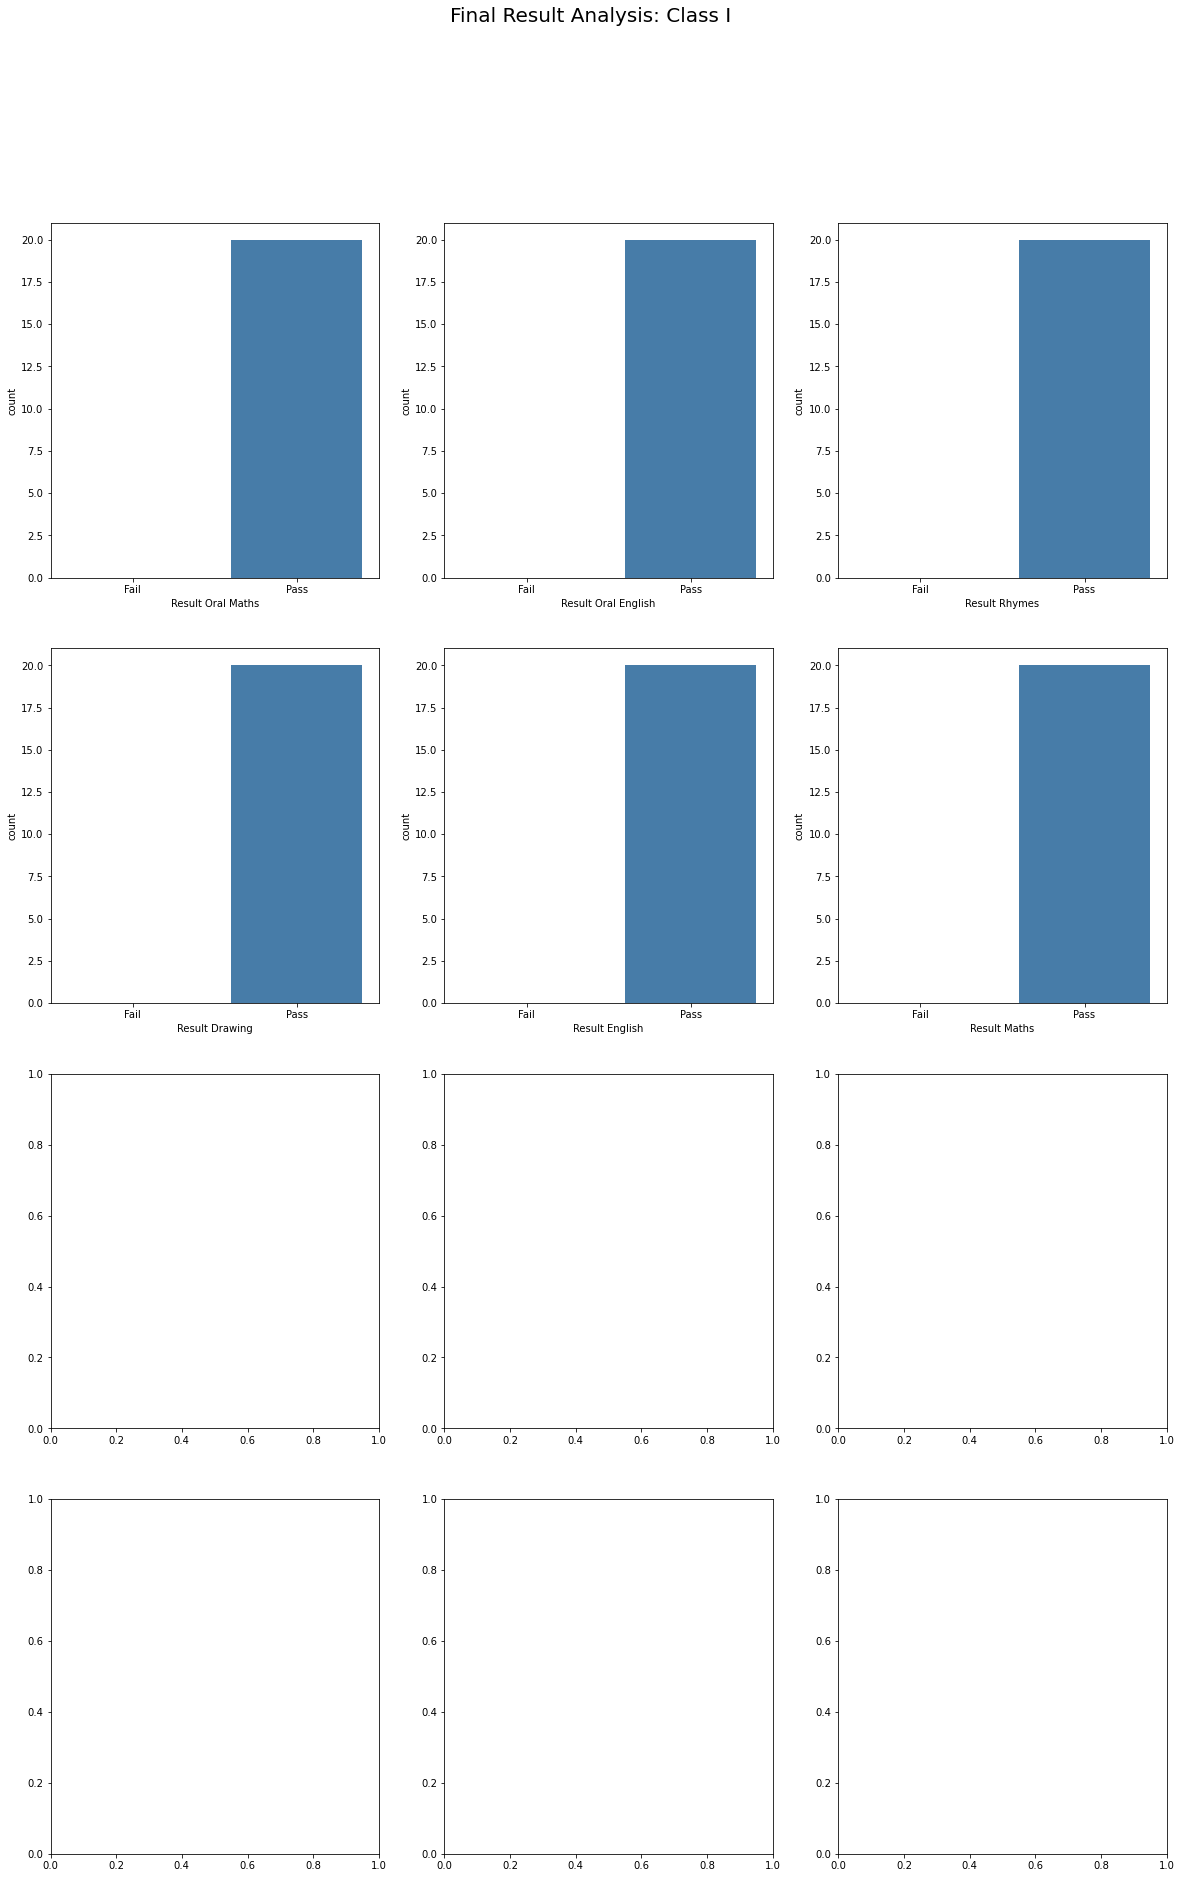

In [18]:
# Combine the charts in one figure
fig, axes = plt.subplots(4, 3, figsize=(20, 30));

# Set the title of the figure
fig.suptitle('Final Result Analysis: Class I', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();